## Bienvenid@ a este Notebook de refuerzo!

Aquí encontrarás información muy resumida sobre el contenido impartido en las clases en formato vídeo, además de ejemplos extra y una serie de ejercicios para asentar correctamente el conocimiento!

Si tienes cualquier duda puedes comunicarlo en el foro de la clase.

Animo!

# Estadística vs Probabilidad

- La estadística es una rama de las matemáticas
  - Abarca el análisis de eventos que ya han ocurrido.
  - Lo hace englobando la recolección, organización, interpretación y presentación de los datos.
  - La estadística es principalmente una rama aplicada de las matematicas, que intenta encontrar el sentido de observaciones en el mundo real.

- La teoría de la probabilidad sin embargo es una rama teórica de las matemáticas.
  - Trata de predecir numéricamente la probabilidad de eventos futuros.




# Descriptiva vs Inferencial

- Descriptiva: Se encarga de analizar características en los datos de los que disponemos, y ofrecernos diferentes medidas a modo de resumen.
    - No hay incerteza, sólo hechos.


  - Inferencial: Se encarga de recoger muestras en los datos y proyectar conclusiones en grupos más grandes o diferentes. En esta rama de la estadística nos ayudamos de la teoría de la probabilidad para realizar estas inferencias.
    - No es información absoluta, hablamos de generalizaciones, a menudo muy precisas.




# Variables

* Son la materia prima con la que trabajamos
* Pueden referirse de un valor individual, pero suelen hablar de *grupos de datos*.
* Las variables son los atributos de cualquier objeto que estudiamos

* Se dividen en diferentes categorías

* Esta categorización es indistinta de si hablamos de estadistica descriptiva o inferencial

* En estadística, esta categorización se hace en función al uso analítico que les podemos dar.

* El sentido de categorizar estas variables es saber qué técnicas podemos aplicar a cada tipo para extraer información valiosa, que es el objetivo principal de la estadística

## Análisis


- **Univariable**: Cuando medimos sólamente un variable. Se utiliza para conocer las propiedades de una variable.
    - Por ejemplo, conocer la media, mediana, etc.

- **Bivariable**: Explica los comportamientos entre dos variables cuando son enfrentadas entre ellas.
    - Por poner un ejemplo, cuando buscamos la correlación entre del peso y altura entre personas.

- **Multivariable**: Este análisis incluye 3 o más variables a analizar. Las técnicas que recoge son las más precisas a la hora de inferir estos resultados a la realidad, ya que tiene en cuenta una cantidad enorme de características.

## Approach cuantitativo / Approach visual

Este concepto es sencillo pero necesario. Decimos que hacemos una aproximación (approach):
 - **Cuantitativo**: Cuando hablamos de números
 - **Visual**: Cuando hablamos de visualizaciones

## Distribuciones


- Una **distribución** muestra la *frecuencia* en la que aparecen nuestros datos, y se representa a través de un histograma.
- Estos histogramas ordenan los datos en contenedores (o *bins*) en el eje horizontal, según su valor, y agrupa la cantidad de ocurrencias en estos `bins`

- Todas las tecnicas de **análisis univariable** las haremos con una muestra (*sample*), donde sus datos se distribuyen en forma de *distribución normal*.
- Este es un tipo de distribución que simula fenómenos que ocurren en la naturaleza, como por ejemplo, el peso de una especie animal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sample = np.random.normal(loc=1.75, scale=0.1, size=1000).round(2)


def plot(sample, measures=[], text=[]):

  fig, ax = plt.subplots(figsize=(15, 7))
  plt.hist(sample, bins=300, color='blue', label='Frecuencia', edgecolor='black', width=.008, alpha=0.1)

  colors = ['red', 'green', 'blue', 'orange', 'black']

  if len(measures) > 0:

    i = 0

    for m, t, c in zip(measures, text, colors):

      i += 1
      ax.axvline(x=m, linestyle='--', color=c)
      plt.annotate(s=t, xy=(m, 40), xytext= (m-.07, 40-(i*5)), size=14, c=c)





  plt.title('Distribución normal')
  plt.xlabel('Valor')
  plt.ylabel('Frecuencia')
  plt.legend()
  plt.show()

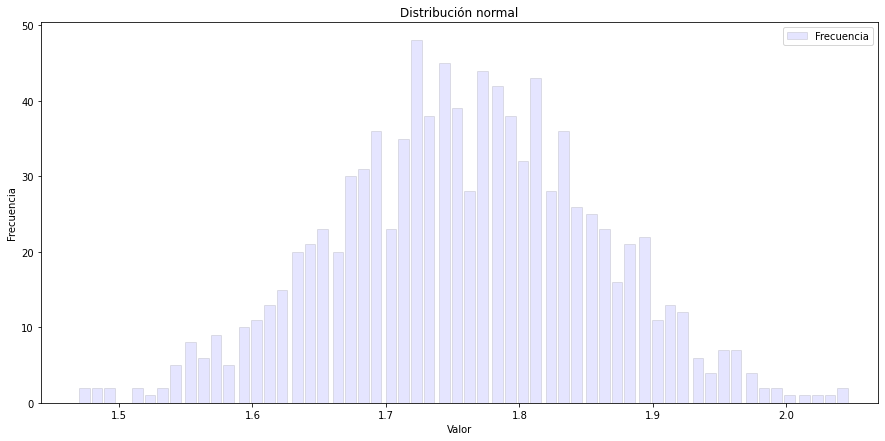

In [ ]:
plot(sample, measures=[], text=[])

## Outliers


- Un **outlier** es un punto en nuestra distribución que difiere muchísimo del resto de nuestros valores. Puede estar en un extremo inferior o superior.
- Estos valores muchas veces pueden ser atribuidos a errores de escritura de nuestros datos, o de datos que no tienen mucho sentido dentro del contexto.
  - Por ejemplo, si en una muestra de alturas humanas tenemos una observación que mide `4.35m`, encontramos un outlier en el extremo superior que no tiene sentido.
- Estos **outliers** habitualmente se identifican para eliminarlos o señalarlos en casos que sea necesario.

# Análisis Univariable



## Centralidad (Central tendency)

- Agrupa varias medidas que hablan sobre los diferentes valores centrales de nuestros datos

- Sirven para resumir información de nuestras variables

## Media

- La **media** (en inglés **mean** o **average**) un valor que encontramos sumando todos los valores dividido por la cantidad de nuestra muestra.

- notación: letra griega **μ** (*mu*)




#### Cálculo manual

`μ = suma de todos los datos / cantidad de datos`

In [ ]:
mean = np.sum(sample) / len(sample)

mean

1.75521

#### Función Python

`mean = np.mean(sample)`

In [ ]:
mean2 = np.mean(sample)

print([mean, mean2])

[1.75521, 1.75521]


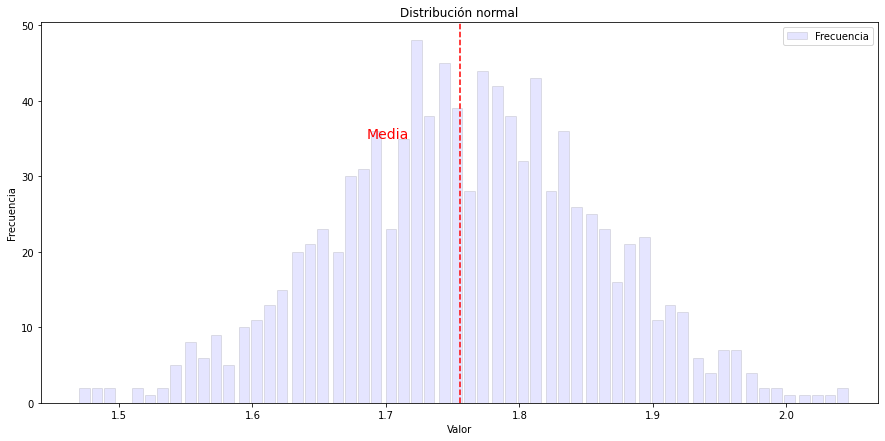

In [ ]:
plot(sample, [mean, mean2], ['Media'])

## Mediana


- La **mediana** (en inglés **median**) un valor que encontramos ordenando los valores y seleccionando justo el que está en la mitad

- habitualmente se usa la M pero también se escribe x̃ (x tilde)

La **mediana** es menos susceptible a valores extremos (*outliers*) que la media
  - Cuando tenemos valores dispares o outliers, ofrece centralidad más precisa

#### Cálculo manual

- Ordenar todos los valores
- Localizar el valor central

In [ ]:
sample_sorted = np.sort(sample)

median = sample_sorted[int(len(sample_sorted)/2)]

median

1.75

#### Función Python

`M = np.median(sample)`

In [ ]:
median2 = np.median(sample)

print([median, median2])

[1.75, 1.75]


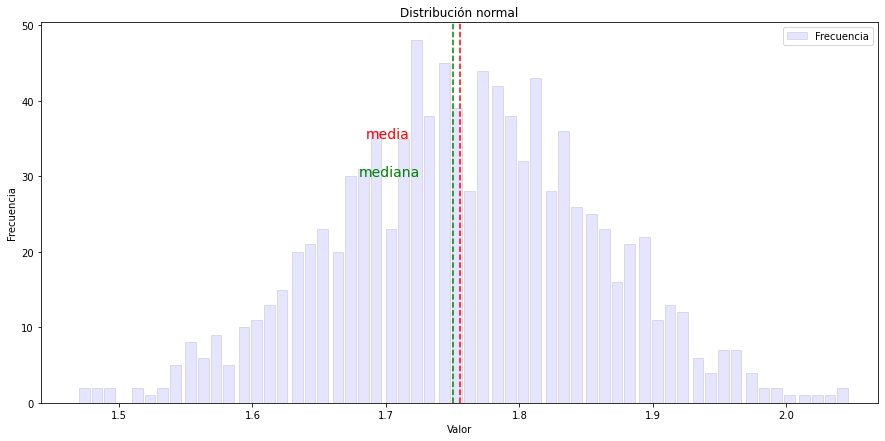

In [ ]:
plot(sample, [mean, median], ['media', 'mediana'])

- Cuando tenemos números impares, el número que cae en la mitad está claro: [1, 3, **6**, 9, 11]

- Qué pasa cuando tenemos números pares? Dos posibilidades:
  - Que la mediana sea el mismo número, por lo tanto no hay discusión
  - Tenemos dos medianas. En este caso lo que hace automáticamente Numpy es dividir la suma de las medianas entre dos. Sacando la media de estas medianas.

- Para saber estas medianas, podemos usar el módulo `statistics` y sus funciones `.median_low(sample)` y `.median_high(sample)`:

In [ ]:
import statistics

sample_alt = [1, 3, 6, 7, 9, 11]

low_median = statistics.median_low(sample_alt)
high_median = statistics.median_high(sample_alt)


print([low_median, high_median])

[6, 7]



## Moda

* La **moda** de una muestra es el valor que más se repite en ella

* Numpy no tiene una función para encontrar la moda, pero el módulo statistics sí que lo tiene.

In [ ]:
mode = statistics.mode(sample)

mode

1.72

* Si tenemos dos modas, el módulo statistics no sabrá cuál elegir, por lo que tirará error:

In [ ]:
varias_modas = [ 1, 3, 3, 4, 6, 6]

statistics.mode(varias_modas)

StatisticsError: ignored

- Si esto sucede, podemos solucionarlo con statistics.multimode(sample), que nos devolverá varias modas (las que más se repitan).
- **Aviso:** El entorno de Google Colab, `a Octubre de 2022`, funciona con **Python 3.7**. Para utilizar la función multimode se necesita **Python 3.8+**, por lo que la siguiente celda *podría no funcionar*

In [ ]:
## Python 3.8+ (estamos en 3.7)

statistics.multimode(sample)

AttributeError: ignored

### Ejercicio!

- Define una función que devuelva un diccionario, indicando la moda o posibles modas de una muestra **sin usar ninguna librería externa**:

*Recuerda que pueden haber varias soluciones*

In [ ]:
### Código aquí

In [ ]:
#@title Solución

def frecuencia(array):

    freq = {}

    for i in array:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1

    return freq


# Variabilidad / Dispersión


- Sólo con las medidas de centralidad no podemos hacernos una idea de nuestros datos
- Medidas para analizar lo lejos que se encuentran nuestros datos respecto el centro de la distribución numérica

## Rango

- El **rango** (*range*) es la diferencia entre nuestro valor más alto y el más bajo.

- No hay función para calcularlo

In [ ]:
range = max(sample) - min(sample)

range

0.5700000000000001

## Percentiles

* Son puntos en nuestra distribución para indicar cuántos valores caen por debajo cada uno de estos puntos.


* Dependiendo del uso este valor se puede modificar. Por ejemplo, un sistema: calcular rendimiento individual sobre una población.
  - Imaginaos que haceis un examen, donde la puntuación es de 1 a 10, y sacáis un 8.
  - Bien, habéis sacado un 80% de la nota posible, o sea, estáis en el 80 percentil del total de la nota que puedes sacar.
  - Pero en qué posición está tu rendimiento con respecto al de tus compañeros?

In [ ]:
notas = np.array([3.4, 7.6, 8, 5.5, 6.3, 7.4, 2.5, 9.1, 3.9, 7.1,
         6.3, 8.2, 6.3, 7.3, 6.7, 5.2, 8.7, 8.2, 6.3, 8.9])

tu_nota = 8

len(notas)

20

- Para calcular tu rendimiento debemos ordenar los valores, de menor a mayor, y encontrar la posición (indice) en ellos:

In [ ]:
notas_sorted = np.sort(notas)

pos = np.where(notas_sorted == tu_nota)[0]

pos

array([14])

- Después, multiplicamos el índice por 100 y lo dividimos por la cantidad de notas:

In [ ]:
p = pos * 100 / len(notas)

p

array([70.])

En este caso vemos que tu nota está en el 70 percentil, indicando que tu rendimiento ha sido mejor que el 70% de los alumnos.

Pero cómo podremos saber cuál es la nota necesaria para ser mejor que el 90% de los alumnos?

### Cálculo manual

In [ ]:
nota = 90 * (tu_nota) / 100

nota



7.2

### Función Python

In [ ]:
nota2 = np.percentile(notas, 90)

print(nota, nota2)

7.2 8.719999999999999


### Cuartiles

- Usando la misma lógica de los percentiles, tenemos el concepto de cuartiles
- Los percentiles dividen nuestra distribución por porcentaje
- Los cuartiles son los puntos de 25%, 50% y 75%
 - el 50% es la mediana de nuestra distribucion, al que llamamos Q2
 - el 25% es la mediana de la mediana de nuestros datos (el 50% del 50%), se le llama Q1
 - el 75% es la mediana del 50% restante, el Q3






In [3]:
sample1000 = np.random.normal(loc=1.75, scale=.1, size=1000).round(2)

sample1000[:20]

sample_1000 = np.sort(sample1000)

Q1 = np.percentile(sample1000, 25)
Q3 = np.percentile(sample1000, 75)

IQR = Q3 - Q1


In [4]:
print(Q1, Q3, IQR)

1.68 1.81 0.13000000000000012


In [8]:
sample1000[:20]

array([1.64, 1.64, 1.8 , 1.67, 1.54, 1.66, 1.71, 1.81, 1.58, 1.85, 1.79,
       1.7 , 1.8 , 1.9 , 1.68, 1.77, 1.89, 1.81, 1.91, 1.75])

### IQR

- Entender los percentiles nos permite el uso del IQR (rango intercuartil)
- Sirve para conocer la dispersión de la mitad central de tus datos.
- Es especialmente útil en distribuciones asimétricas, o skewed distributions
- El IQR es usado en los boxplots, que ya vimos en el curso de introducción. Permite conocer nuestra distribución de una manera rápida
- Además, el IQR nos permite detectar los outliers (recordamos, los valores extremos y atípicos) de una forma automatizada.

- Si vemos la estructura de un boxplot, podemos fijarnos que el área roja representa la mitad del centro de nuestra distribución



![](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

- Pero el IQR también sirve para encontrar los outliers numéricamente.
  - Para detectar los outliers de la zona inferior, calcularemos el Q1 (el 25 percentil) y le restaremos nuestro IQR*1.5. Todos los valores que se encuentren por debajo de ese número, pueden ser considerados outliers
  - Para la zona superior, simplemente tendremos que calcular el Q3 y sumarle el IQR*1.5. Del mismo modo, todos los valores que caigan por encima de ese valor también pueden ser considerados outliers


In [7]:
outlier_inf = np.where(sample1000 < (Q1 - 1.5*(IQR)))[0]
outlier_sup = np.where(sample1000 > (Q3 + 1.5*(IQR)))[0]

outlier_inf

sample1000[outlier_sup]


array([2.01, 2.04, 2.02, 2.03, 2.05, 2.06, 2.01])

## Varianza

- Es una única cifra que sirve para medir la distancia entre los valores y la media



#### Cálculo manual

- Se calcula restando la media a cada valor que tenemos, realizando el cuadrado de cada operación

In [ ]:
sus = [(x - mean)**2 for x in sample]

var = np.sum(sus) / len(sample)

var

0.009660155900000002

#### Función Python

- Podemos usar **numpy** y su función `np.var(sample)`

In [ ]:
np.var(sample)

0.009660155900000002

- Realmente no es muy utilizada, pero es necesaria para conocer cómo funciona nuestra siguiente (y conocida) medida estadística:

## Standard Deviation

- La desviación estandar (standard deviation) es una evolución de la varianza, representada con la letra **σ** (sigma)
- En el sentido que esta desviación estandar, es más fácil de comprender que la varianza, ya que está expresada en la misma escala que nuestros datos
- Esto se consigue simplemente calculando la raiz cuadrada de nuestra varianza.




In [ ]:
std = np.sqrt(var)

std2 = np.std(sample)

print(std, std2)

0.09828609209852635 0.09828609209852635


- Qué significa que está representada en la misma escala que nuestros datos?
- Lo primero que tenemos que saber es que la desviación estándar es una medida de distancia (de ahí lo de dispersión), y parte desde la media de nuestros datos, en ambas direcciones
- Si lo observamos en forma de gráfica, vemos que genera unas divisiones en nuestra distribución         


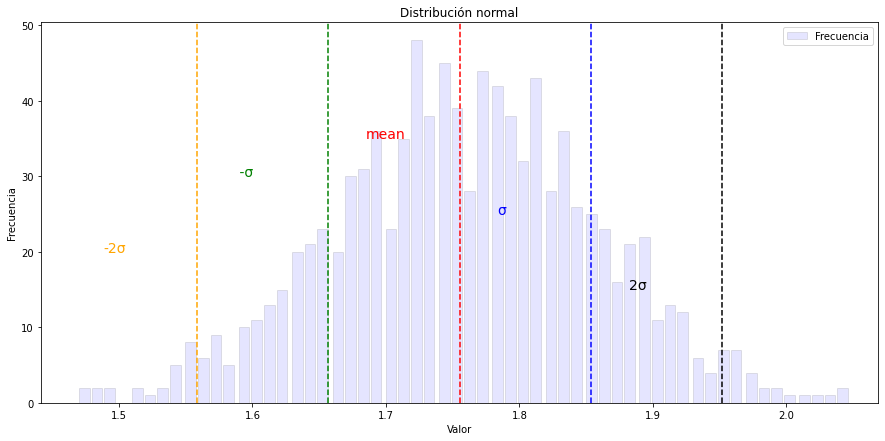

In [ ]:
plot(sample, [mean, mean-std,  mean+std, mean-std*2, mean+std*2], ['mean',' -σ', 'σ', '-2σ', '2σ'])

- Algo súper importante relacionado con la desivación estandar es la llamada Empirical Rule
  - también llamada 68-95-99.7 rule
  - permite encontrar dónde caen ciertas cantidades de nuestros datos
  - dentro de los márgenes de **nuestra primera desviación estándar** entran el 68% de nuestros datos
  - dentro de los márgenes **de 2 std** caen el 95%
  - dentro **de 3std** caen el 99,7%


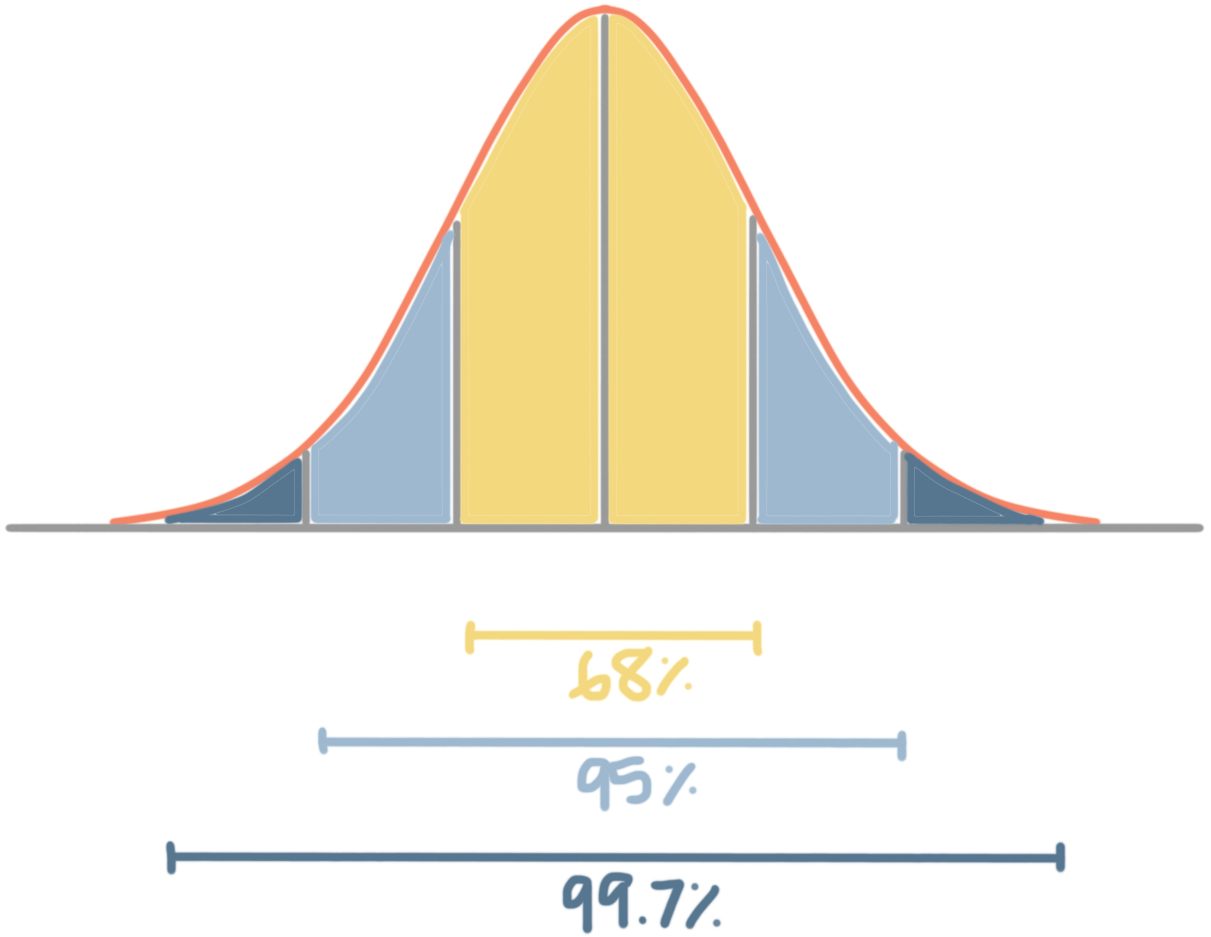

  - Tiene diversas utilidades, pero una de ellas es ayudar a predecir la probabilidad de que un número aleatorio dentro de esta distribución caiga dentro de estos valores

# Modality

- La modalidad de una distribución indica cuántos picos existen en ella.

- La distribución normal, que hemos estado mirando, es unimodal, ya que sólo hay un pequeño grupo de valores que aparecen con más frecuencia en nuestra distribución.


- Las distribuciones bimodales son las que tienen dos picos en su forma.
  - Por lo general, suelen indicar que hay factores externos que influyen en estos valores.
  - Tenemos varios tipos de distribuciones bimodales: la distribución de bernouilli, la distribución binomial o la distribución beta

- También tenemos las distribuciones multimodales. Estas son más raras de encontrar, y son las que tienen 2 o más picos en sus distribuciones.
- Si, las bimodales también son un tipo de multimodal! Pero ocurren con más frecuencia, por lo que tienen una categoría para ellas


# Kurtosis

- Otro parámetro que analizamos en nuestras distribuciones es la kurtosis.
- Esta medida indica cuán anchas son las colas de nuestras distribuciones. Con colas nos referimos a la cantidad de datos que entran a ambos lados de nuestra media.
- Si la mayoría de observaciones se concentra en el centro de nuestros datos, o sea, en la media, decimos que tenemos una kurtosis positiva.
  - Lo importante de esto es saber que estas distribuciones tienen pocas probabilidades de contener outliers
- Si los datos se concentran más en los extremos, decimos que tenemos una kurtosis negativa. En este caso, solemos tener más outliers en nuestra distribución.
- No vamos a profundizar en cómo se calcula ya que de momento no nos es de gran utilidad.


In [ ]:
from scipy.stats import kurtosis

kurtosis(sample)

-0.1184636308389524

![](https://editor.analyticsvidhya.com/uploads/57983kurt1.png)

- Y para qué nos sirve esta kurtosis? Bien, imaginaos que estamos analizando precios de un producto de una ciudad, por ejemplo el pan.
- Podemos analizar si los precios del pan son más o menos estables a lo largo de esta ciudad. Por ejemplo, si tenemos una kurtosis muy negativa, o sea, una distirbución platikurtica, significará que el precio del pan en nuestra ciudad no es consistente, por lo tanto tendrá más panaderías donde los precios sean más extremos, tanto por barato como por caro

## Skewness / Asimetría

- No siempre nuestras distribuciones tienen una naturaleza simétrica
- El Skewness, o asimetría, indica la simetría de las colas de nuestra distribución.
- La asimetría es **POSITIVA** si la cola se extiende a la derecha
- Por otro lado, se extiende hacia la **IZQUIERDA** si es negativa


In [ ]:
from scipy.stats import skew, skewnorm


sample = skewnorm.rvs(10, size=1000)

skew(sample)

0.8482385939486996

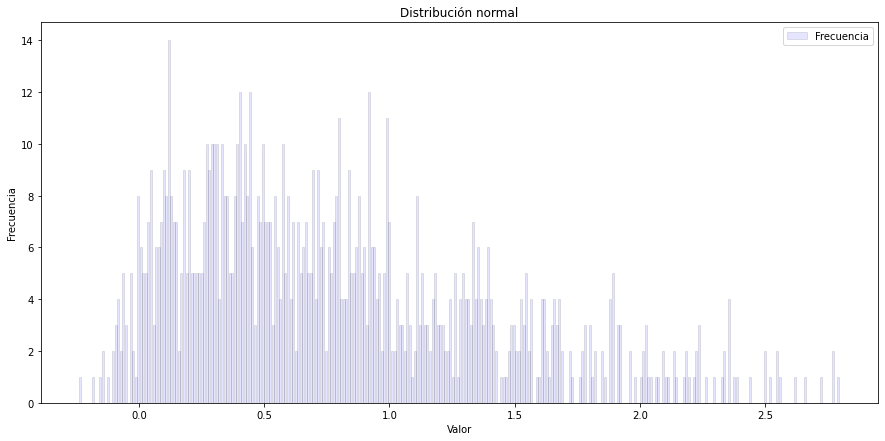

In [ ]:
plot(sample, [], [])